In [1]:
import requests
from bs4 import BeautifulSoup
from lxml import etree
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
r = requests.get('https://listado.mercadolibre.com.ar/computadora')

In [3]:
r.status_code

200

In [4]:
r.content

b'\n<!DOCTYPE html>\n<html lang="es-AR">\n<head><link rel="preconnect" href="https://www.google-analytics.com"/><link rel="preconnect" href="https://www.google.com"/><link rel="preconnect" href="https://data.mercadolibre.com"/><link rel="preconnect" href="https://http2.mlstatic.com"/><link rel="preconnect" href="https://stats.g.doubleclick.net"/><link rel="preconnect" href="https://analytics.mercadolibre.com.ar"/><link rel="preconnect" href="https://analytics.mercadolibre.com"/><link rel="preconnect" href="https://www.google.com.ar"/><script type=\'text/javascript\'>window.NREUM||(NREUM={});NREUM.info = {"agent":"","beacon":"bam.nr-data.net","errorBeacon":"bam.nr-data.net","licenseKey":"NRBR-766f4fb616d3a2368ce","applicationID":"1729522169","agentToken":null,"applicationTime":1098.854239,"transactionName":"YlZQYEVZC0QEV0BZV1scd0xHSgBEFl5HH39wZx0bHQ==","queueTime":0,"ttGuid":"af684afbc7c88f20"}; (window.NREUM||(NREUM={})).init={privacy:{cookies_enabled:true},ajax:{deny_list:["bam.nr-dat

In [5]:
r.text

'\n<!DOCTYPE html>\n<html lang="es-AR">\n<head><link rel="preconnect" href="https://www.google-analytics.com"/><link rel="preconnect" href="https://www.google.com"/><link rel="preconnect" href="https://data.mercadolibre.com"/><link rel="preconnect" href="https://http2.mlstatic.com"/><link rel="preconnect" href="https://stats.g.doubleclick.net"/><link rel="preconnect" href="https://analytics.mercadolibre.com.ar"/><link rel="preconnect" href="https://analytics.mercadolibre.com"/><link rel="preconnect" href="https://www.google.com.ar"/><script type=\'text/javascript\'>window.NREUM||(NREUM={});NREUM.info = {"agent":"","beacon":"bam.nr-data.net","errorBeacon":"bam.nr-data.net","licenseKey":"NRBR-766f4fb616d3a2368ce","applicationID":"1729522169","agentToken":null,"applicationTime":1098.854239,"transactionName":"YlZQYEVZC0QEV0BZV1scd0xHSgBEFl5HH39wZx0bHQ==","queueTime":0,"ttGuid":"af684afbc7c88f20"}; (window.NREUM||(NREUM={})).init={privacy:{cookies_enabled:true},ajax:{deny_list:["bam.nr-data

In [6]:
soup = BeautifulSoup(r.content,'html.parser')

In [7]:
titulos=soup.find_all('h2',attrs={"class":"ui-search-item__title shops__item-title"})
titulos

[<h2 aria-level="3" class="ui-search-item__title shops__item-title">Disco duro externo Seagate Expansion STKM2000400 2TB negro</h2>,
 <h2 aria-level="3" class="ui-search-item__title shops__item-title">Notebook Hp Amd Ryzen 7 5700u 12gb 256gb Ssd 15.6  Touchscreen Tactil Windows 11 (15-ef2081ms)</h2>,
 <h2 aria-level="3" class="ui-search-item__title shops__item-title">Computador Portátil Evoo 14 Pulgadas Intel 4gb 64gb</h2>,
 <h2 aria-level="3" class="ui-search-item__title shops__item-title">Notebook Hp 450g8 15.6' I7-1165g7 8gb Ram 256gb Ssd W10p</h2>,
 <h2 aria-level="3" class="ui-search-item__title shops__item-title">Computadoras Notebook Laptop Baratas Ssd 256gb 6gb Windows</h2>,
 <h2 aria-level="3" class="ui-search-item__title shops__item-title">Pc Cpu Computadora Intel Core I5 16gb Ram Ssd 480gb</h2>,
 <h2 aria-level="3" class="ui-search-item__title shops__item-title">Computadora Cpu Armada Intel Core I5 8 Gb 240 Gb Ssd</h2>,
 <h2 aria-level="3" class="ui-search-item__title shops_

In [8]:
titulos= [i.text for i in titulos]
titulos


['Disco duro externo Seagate Expansion STKM2000400 2TB negro',
 'Notebook Hp Amd Ryzen 7 5700u 12gb 256gb Ssd 15.6  Touchscreen Tactil Windows 11 (15-ef2081ms)',
 'Computador Portátil Evoo 14 Pulgadas Intel 4gb 64gb',
 "Notebook Hp 450g8 15.6' I7-1165g7 8gb Ram 256gb Ssd W10p",
 'Computadoras Notebook Laptop Baratas Ssd 256gb 6gb Windows',
 'Pc Cpu Computadora Intel Core I5 16gb Ram Ssd 480gb',
 'Computadora Cpu Armada Intel Core I5 8 Gb 240 Gb Ssd',
 'Disco sólido interno Kingston SA400S37/240G 240GB negro',
 'Computadora Pc Cpu Solarmax Intel Core I3 12va 8gb 240 Ssd',
 'Silla Gamer Reforzada - Playstation Pc Gamer Xbox Ph Import',
 'Pc Armada Intel C I3 + 8 Gb Ram Ssd 240 Gab  Kit  W10 Offic ',
 'Pc Armada Intel Core I5 8gb Ssd240 W10 Office',
 'Webcam Cámara Web Full Hd Autofoco Micrófono Usb Pc Windows',
 'Pc Armada Intel Core I5 8gb Ssd 480 Gab   Tec Y Mouse  W11',
 'Computadora  Wifi  Home Oficce 8gb Monitor 19  Windows 10',
 'Cpu Dell 780 - 4 Gb, Disco 250 Gb + Monitor 17 ',
 '

In [9]:
urls=soup.find_all('a',attrs={"class":"ui-search-item__group__element shops__items-group-details ui-search-link"})
urls

[<a class="ui-search-item__group__element shops__items-group-details ui-search-link" href="https://www.mercadolibre.com.ar/disco-duro-externo-seagate-expansion-stkm2000400-2tb-negro/p/MLA18625152?pdp_filters=category:MLA1648#searchVariation=MLA18625152&amp;position=1&amp;search_layout=stack&amp;type=product&amp;tracking_id=6339f04c-c613-44ca-b6e4-7327dc439d03" title="Disco duro externo Seagate Expansion STKM2000400 2TB negro"><h2 aria-level="3" class="ui-search-item__title shops__item-title">Disco duro externo Seagate Expansion STKM2000400 2TB negro</h2></a>,
 <a class="ui-search-item__group__element shops__items-group-details ui-search-link" href="https://www.mercadolibre.com.ar/notebook-hp-amd-ryzen-7-5700u-12gb-256gb-ssd-156-touchscreen-tactil-windows-11-15-ef2081ms/p/MLA19569670?pdp_filters=category:MLA1648#searchVariation=MLA19569670&amp;position=2&amp;search_layout=stack&amp;type=product&amp;tracking_id=6339f04c-c613-44ca-b6e4-7327dc439d03" title="Notebook Hp Amd Ryzen 7 5700u 12

In [10]:
urls[0].get('href')


'https://www.mercadolibre.com.ar/disco-duro-externo-seagate-expansion-stkm2000400-2tb-negro/p/MLA18625152?pdp_filters=category:MLA1648#searchVariation=MLA18625152&position=1&search_layout=stack&type=product&tracking_id=6339f04c-c613-44ca-b6e4-7327dc439d03'

In [11]:
urls=[i.get('href') for i in urls]
urls

['https://www.mercadolibre.com.ar/disco-duro-externo-seagate-expansion-stkm2000400-2tb-negro/p/MLA18625152?pdp_filters=category:MLA1648#searchVariation=MLA18625152&position=1&search_layout=stack&type=product&tracking_id=6339f04c-c613-44ca-b6e4-7327dc439d03',
 'https://www.mercadolibre.com.ar/notebook-hp-amd-ryzen-7-5700u-12gb-256gb-ssd-156-touchscreen-tactil-windows-11-15-ef2081ms/p/MLA19569670?pdp_filters=category:MLA1648#searchVariation=MLA19569670&position=2&search_layout=stack&type=product&tracking_id=6339f04c-c613-44ca-b6e4-7327dc439d03',
 'https://www.mercadolibre.com.ar/computador-portatil-evoo-14-pulgadas-intel-4gb-64gb/p/MLA21304987?pdp_filters=category:MLA1648#searchVariation=MLA21304987&position=3&search_layout=stack&type=product&tracking_id=6339f04c-c613-44ca-b6e4-7327dc439d03',
 'https://articulo.mercadolibre.com.ar/MLA-1124661616-notebook-hp-450g8-156-i7-1165g7-8gb-ram-256gb-ssd-w10p-_JM#position=15&search_layout=stack&type=item&tracking_id=6339f04c-c613-44ca-b6e4-7327dc4

In [12]:
#//div[@class="ui-search-price__second-line shops__price-second-line"]//span[@class="andes-money-amount__fraction"]

In [13]:
dom= etree.HTML(str(soup))
precios=dom.xpath('//div[@class="ui-search-price__second-line shops__price-second-line"]//span[@class="andes-money-amount__fraction"]')
precios[0].text

'66.699'

In [14]:
precios=[i.text for i in precios]
precios


['66.699',
 '789.999',
 '264.999',
 '1.573.218',
 '249.999',
 '198.998',
 '199.990',
 '16.184',
 '386.490',
 '116.161',
 '169.999',
 '194.999',
 '2.199',
 '199.999',
 '139.000',
 '90.700',
 '189.990',
 '85.600',
 '79.900',
 '14.224',
 '729.266',
 '419.999',
 '39.899',
 '289.990',
 '19.899',
 '229.000',
 '4.199',
 '10.499',
 '189.990',
 '2.999',
 '129.400',
 '235.000',
 '2.490',
 '1.800',
 '1.239',
 '168.700',
 '279.990',
 '282.999',
 '229.990',
 '169.990',
 '11.699',
 '8.870',
 '3.999',
 '129.999',
 '6.799',
 '2.299',
 '1.599',
 '279.999',
 '7.999',
 '1.699',
 '1.050.000',
 '159.999',
 '2.099',
 '1.899']

In [15]:
df=pd.DataFrame({'titulo':titulos,'url':urls,'precio':precios})
df


,titulo,url,precio
0,Disco duro externo Seagate Expansion STKM20004...,https://www.mercadolibre.com.ar/disco-duro-ext...,66.699
1,Notebook Hp Amd Ryzen 7 5700u 12gb 256gb Ssd 1...,https://www.mercadolibre.com.ar/notebook-hp-am...,789.999
2,Computador Portátil Evoo 14 Pulgadas Intel 4gb...,https://www.mercadolibre.com.ar/computador-por...,264.999
3,Notebook Hp 450g8 15.6' I7-1165g7 8gb Ram 256g...,https://articulo.mercadolibre.com.ar/MLA-11246...,1.573.218
4,Computadoras Notebook Laptop Baratas Ssd 256gb...,https://www.mercadolibre.com.ar/computadoras-n...,249.999
5,Pc Cpu Computadora Intel Core I5 16gb Ram Ssd ...,https://articulo.mercadolibre.com.ar/MLA-13725...,198.998
6,Computadora Cpu Armada Intel Core I5 8 Gb 240 ...,https://articulo.mercadolibre.com.ar/MLA-86096...,199.990
7,Disco sólido interno Kingston SA400S37/240G 24...,https://www.mercadolibre.com.ar/disco-solido-i...,16.184
8,Computadora Pc Cpu Solarmax Intel Core I3 12va...,https://click1.mercadolibre.com.ar/mclics/clic...,386.490
9,Silla Gamer Reforzada - Playstation Pc Gamer X...,https://click1.mercadolibre.com.ar/mclics/clic...,116.161


In [16]:
df.to_csv('computadores_mercado_libre.csv')

In [17]:
#//a[@class="andes-pagination__link shops__pagination-link ui-search-link"]

In [18]:
dom= etree.HTML(str(soup))
siguiente=dom.xpath('//li[@class="andes-pagination__button andes-pagination__button--next shops__pagination-button"]//a[@class="andes-pagination__link shops__pagination-link ui-search-link"]')[0].get('href')
siguiente


'https://listado.mercadolibre.com.ar/computacion/computadora_Desde_51_NoIndex_True'

In [19]:
ini= soup.find('span',attrs={'class':'andes-pagination__link'})
ini=int(ini.text)
ini

1

In [20]:
# //li[@class="andes-pagination__page-count"]

In [21]:
can= soup.find('li',attrs={'class':'andes-pagination__page-count'})
can=int(can.text.split(sep=" ",maxsplit=1)[1])
can

40

In [22]:
lista_titulos=[]
lista_urls=[]
lista_precios=[]


In [23]:
lista_titulos=[]
lista_urls=[]
lista_precios=[]
siguiente='https://listado.mercadolibre.com.ar/computadora'
while True:
  r= requests.get(siguiente)
  if r.status_code ==200:
    soup=BeautifulSoup(r.content,'html.parser')
    #Titulos
    titulos=soup.find_all('h2',attrs={"class":"ui-search-item__title shops__item-title"})
    titulos= [i.text for i in titulos]
    lista_titulos.extend(titulos)
    #Urls
    urls=soup.find_all('a',attrs={"class":"ui-search-item__group__element shops__items-group-details ui-search-link"})
    urls=[i.get('href') for i in urls]
    lista_urls.extend(urls)
    #Precios
    dom= etree.HTML(str(soup))
    precios=dom.xpath('//div[@class="ui-search-price__second-line shops__price-second-line"]//span[@class="andes-money-amount__fraction"]')
    precios=[i.text for i in precios]
    lista_precios.extend(precios)
    ini= soup.find('span',attrs={'class':'andes-pagination__link'})
    ini=int(ini.text)
    can= soup.find('li',attrs={'class':'andes-pagination__page-count'})
    can=int(can.text.split(sep=" ",maxsplit=1)[1])




  else:
    break
  print(ini,can,siguiente)

  if ini==can:
    break
  siguiente=dom.xpath('//li[@class="andes-pagination__button andes-pagination__button--next shops__pagination-button"]//a[@class="andes-pagination__link shops__pagination-link ui-search-link"]')[0].get('href')

1 40 https://listado.mercadolibre.com.ar/computadora
2 40 https://listado.mercadolibre.com.ar/computacion/computadora_Desde_51_NoIndex_True
3 40 https://listado.mercadolibre.com.ar/computacion/computadora_Desde_101_NoIndex_True
4 40 https://listado.mercadolibre.com.ar/computacion/computadora_Desde_151_NoIndex_True
5 40 https://listado.mercadolibre.com.ar/computacion/computadora_Desde_201_NoIndex_True
6 40 https://listado.mercadolibre.com.ar/computacion/computadora_Desde_251_NoIndex_True
7 40 https://listado.mercadolibre.com.ar/computacion/computadora_Desde_301_NoIndex_True
8 40 https://listado.mercadolibre.com.ar/computacion/computadora_Desde_351_NoIndex_True
9 40 https://listado.mercadolibre.com.ar/computacion/computadora_Desde_401_NoIndex_True
10 40 https://listado.mercadolibre.com.ar/computacion/computadora_Desde_451_NoIndex_True
11 40 https://listado.mercadolibre.com.ar/computacion/computadora_Desde_501_NoIndex_True
12 40 https://listado.mercadolibre.com.ar/computacion/computadora_

In [24]:
print(len(lista_titulos))
print(len(lista_urls))
print(len(lista_precios))



2206
2206
2206


In [25]:
df=pd.DataFrame({'titulo':lista_titulos,'url':lista_urls,'precio':lista_precios})
df


,titulo,url,precio
0,Disco duro externo Seagate Expansion STKM20004...,https://www.mercadolibre.com.ar/disco-duro-ext...,66.699
1,Notebook Hp Amd Ryzen 7 5700u 12gb 256gb Ssd 1...,https://www.mercadolibre.com.ar/notebook-hp-am...,789.999
2,Computador Portátil Evoo 14 Pulgadas Intel 4gb...,https://www.mercadolibre.com.ar/computador-por...,264.999
3,Notebook Hp 450g8 15.6' I7-1165g7 8gb Ram 256g...,https://articulo.mercadolibre.com.ar/MLA-11246...,1.573.218
4,Computadoras Notebook Laptop Baratas Ssd 256gb...,https://www.mercadolibre.com.ar/computadoras-n...,249.999
...,...,...,...
2201,Set 3x Coolers Ruleman Id-cooling Argb Df-1202...,https://articulo.mercadolibre.com.ar/MLA-92614...,27.375
2202,Placa De Video Msi Gaming Radeon Rx 6800 X Tri...,https://www.mercadolibre.com.ar/placa-de-video...,399.999
2203,Turbina Cooler Rulem√°n 220v 4 Pulgadas Salama...,https://articulo.mercadolibre.com.ar/MLA-91162...,6.710
2204,Teclado gamer Asus ROG Strix Scope RX EVA Edit...,https://www.mercadolibre.com.ar/teclado-gamer-...,232.639


In [26]:
df.shape

(2206, 3)

In [27]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2206 entries, 0 to 2205
Data columns (total 3 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   titulo  2206 non-null   object
 1   url     2206 non-null   object
 2   precio  2206 non-null   object
dtypes: object(3)
memory usage: 51.8+ KB


In [28]:
df['precio'] = df['precio'].str.replace('.', '').apply(float)

<ipython-input-28-77b41d39d7f3>:1: FutureWarning: The default value of regex will change from True to False in a future version. In addition, single character regular expressions will *not* be treated as literal strings when regex=True.
  df['precio'] = df['precio'].str.replace('.', '').apply(float)


In [29]:
df.dtypes


titulo     object
url        object
precio    float64
dtype: object

In [30]:
df.describe().T


,count,mean,std,min,25%,50%,75%,max
precio,2206.0,158204.892112,250669.451495,354.0,5553.0,22999.0,244172.75,2200711.0


In [31]:
df.isna().sum()

titulo    0
url       0
precio    0
dtype: int64

In [32]:

df.duplicated().sum()

0

In [33]:
df.dropna(inplace=True)

In [34]:
df.titulo.nunique()

1776

In [35]:
df=df.drop_duplicates()
df.head(5)

,titulo,url,precio
0,Disco duro externo Seagate Expansion STKM20004...,https://www.mercadolibre.com.ar/disco-duro-ext...,66699.0
1,Notebook Hp Amd Ryzen 7 5700u 12gb 256gb Ssd 1...,https://www.mercadolibre.com.ar/notebook-hp-am...,789999.0
2,Computador Portátil Evoo 14 Pulgadas Intel 4gb...,https://www.mercadolibre.com.ar/computador-por...,264999.0
3,Notebook Hp 450g8 15.6' I7-1165g7 8gb Ram 256g...,https://articulo.mercadolibre.com.ar/MLA-11246...,1573218.0
4,Computadoras Notebook Laptop Baratas Ssd 256gb...,https://www.mercadolibre.com.ar/computadoras-n...,249999.0


In [36]:
df.loc[df['precio']>10000]

,titulo,url,precio
0,Disco duro externo Seagate Expansion STKM20004...,https://www.mercadolibre.com.ar/disco-duro-ext...,66699.0
1,Notebook Hp Amd Ryzen 7 5700u 12gb 256gb Ssd 1...,https://www.mercadolibre.com.ar/notebook-hp-am...,789999.0
2,Computador Portátil Evoo 14 Pulgadas Intel 4gb...,https://www.mercadolibre.com.ar/computador-por...,264999.0
3,Notebook Hp 450g8 15.6' I7-1165g7 8gb Ram 256g...,https://articulo.mercadolibre.com.ar/MLA-11246...,1573218.0
4,Computadoras Notebook Laptop Baratas Ssd 256gb...,https://www.mercadolibre.com.ar/computadoras-n...,249999.0
...,...,...,...
2200,Pc Lenovo Thinkcentre I3 240ssd 8gb Ram + Dvd ...,https://articulo.mercadolibre.com.ar/MLA-14597...,228222.0
2201,Set 3x Coolers Ruleman Id-cooling Argb Df-1202...,https://articulo.mercadolibre.com.ar/MLA-92614...,27375.0
2202,Placa De Video Msi Gaming Radeon Rx 6800 X Tri...,https://www.mercadolibre.com.ar/placa-de-video...,399999.0
2204,Teclado gamer Asus ROG Strix Scope RX EVA Edit...,https://www.mercadolibre.com.ar/teclado-gamer-...,232639.0


In [37]:
df[df.precio>10000]

,titulo,url,precio
0,Disco duro externo Seagate Expansion STKM20004...,https://www.mercadolibre.com.ar/disco-duro-ext...,66699.0
1,Notebook Hp Amd Ryzen 7 5700u 12gb 256gb Ssd 1...,https://www.mercadolibre.com.ar/notebook-hp-am...,789999.0
2,Computador Portátil Evoo 14 Pulgadas Intel 4gb...,https://www.mercadolibre.com.ar/computador-por...,264999.0
3,Notebook Hp 450g8 15.6' I7-1165g7 8gb Ram 256g...,https://articulo.mercadolibre.com.ar/MLA-11246...,1573218.0
4,Computadoras Notebook Laptop Baratas Ssd 256gb...,https://www.mercadolibre.com.ar/computadoras-n...,249999.0
...,...,...,...
2200,Pc Lenovo Thinkcentre I3 240ssd 8gb Ram + Dvd ...,https://articulo.mercadolibre.com.ar/MLA-14597...,228222.0
2201,Set 3x Coolers Ruleman Id-cooling Argb Df-1202...,https://articulo.mercadolibre.com.ar/MLA-92614...,27375.0
2202,Placa De Video Msi Gaming Radeon Rx 6800 X Tri...,https://www.mercadolibre.com.ar/placa-de-video...,399999.0
2204,Teclado gamer Asus ROG Strix Scope RX EVA Edit...,https://www.mercadolibre.com.ar/teclado-gamer-...,232639.0


In [38]:
df.loc[(df['precio']>=200000)&(df['precio']<=500000)]

,titulo,url,precio
2,Computador Portátil Evoo 14 Pulgadas Intel 4gb...,https://www.mercadolibre.com.ar/computador-por...,264999.0
4,Computadoras Notebook Laptop Baratas Ssd 256gb...,https://www.mercadolibre.com.ar/computadoras-n...,249999.0
8,Computadora Pc Cpu Solarmax Intel Core I3 12va...,https://click1.mercadolibre.com.ar/mclics/clic...,386490.0
21,Pc Armada Gamer Amd Ryzen 5 5600g 12 Nucleo Ra...,https://articulo.mercadolibre.com.ar/MLA-93229...,419999.0
23,Computadora Completa Intel Core I5 8 Gb 480 Gb...,https://articulo.mercadolibre.com.ar/MLA-13801...,289990.0
...,...,...,...
2109,Procesador gamer Intel Core i3-8100 BX80684I38...,https://www.mercadolibre.com.ar/procesador-gam...,210649.0
2199,Tableta gr√°fica Wacom One DTC133W0A black y ...,https://www.mercadolibre.com.ar/tableta-grafic...,499999.0
2200,Pc Lenovo Thinkcentre I3 240ssd 8gb Ram + Dvd ...,https://articulo.mercadolibre.com.ar/MLA-14597...,228222.0
2202,Placa De Video Msi Gaming Radeon Rx 6800 X Tri...,https://www.mercadolibre.com.ar/placa-de-video...,399999.0


In [39]:
df.loc[(df['precio']>=500000)|(df['precio']<=200000)]

,titulo,url,precio
0,Disco duro externo Seagate Expansion STKM20004...,https://www.mercadolibre.com.ar/disco-duro-ext...,66699.0
1,Notebook Hp Amd Ryzen 7 5700u 12gb 256gb Ssd 1...,https://www.mercadolibre.com.ar/notebook-hp-am...,789999.0
3,Notebook Hp 450g8 15.6' I7-1165g7 8gb Ram 256g...,https://articulo.mercadolibre.com.ar/MLA-11246...,1573218.0
5,Pc Cpu Computadora Intel Core I5 16gb Ram Ssd ...,https://articulo.mercadolibre.com.ar/MLA-13725...,198998.0
6,Computadora Cpu Armada Intel Core I5 8 Gb 240 ...,https://articulo.mercadolibre.com.ar/MLA-86096...,199990.0
...,...,...,...
2197,Genius Dx-110 Ps/2 - Negro,https://www.mercadolibre.com.ar/genius-dx-110-...,4809.0
2198,Conector Macho Tipo Pc Ups Interlock Iec C14 P...,https://articulo.mercadolibre.com.ar/MLA-68580...,3113.0
2201,Set 3x Coolers Ruleman Id-cooling Argb Df-1202...,https://articulo.mercadolibre.com.ar/MLA-92614...,27375.0
2203,Turbina Cooler Rulem√°n 220v 4 Pulgadas Salama...,https://articulo.mercadolibre.com.ar/MLA-91162...,6710.0


In [40]:
df.query('`precio`==4990')['titulo'][:2].to_list()

['Mousepad L (60x28,5cm) Anime Cod:023 - Evangelion',
 'Mousepad L (60x28,5cm) Paisaje Cod:009 - Gran Ola']

In [41]:
df.query('`precio`>200000')

,titulo,url,precio
1,Notebook Hp Amd Ryzen 7 5700u 12gb 256gb Ssd 1...,https://www.mercadolibre.com.ar/notebook-hp-am...,789999.0
2,Computador Portátil Evoo 14 Pulgadas Intel 4gb...,https://www.mercadolibre.com.ar/computador-por...,264999.0
3,Notebook Hp 450g8 15.6' I7-1165g7 8gb Ram 256g...,https://articulo.mercadolibre.com.ar/MLA-11246...,1573218.0
4,Computadoras Notebook Laptop Baratas Ssd 256gb...,https://www.mercadolibre.com.ar/computadoras-n...,249999.0
8,Computadora Pc Cpu Solarmax Intel Core I3 12va...,https://click1.mercadolibre.com.ar/mclics/clic...,386490.0
...,...,...,...
2109,Procesador gamer Intel Core i3-8100 BX80684I38...,https://www.mercadolibre.com.ar/procesador-gam...,210649.0
2199,Tableta gr√°fica Wacom One DTC133W0A black y ...,https://www.mercadolibre.com.ar/tableta-grafic...,499999.0
2200,Pc Lenovo Thinkcentre I3 240ssd 8gb Ram + Dvd ...,https://articulo.mercadolibre.com.ar/MLA-14597...,228222.0
2202,Placa De Video Msi Gaming Radeon Rx 6800 X Tri...,https://www.mercadolibre.com.ar/placa-de-video...,399999.0


In [42]:
df[['titulo','precio']]

,titulo,precio
0,Disco duro externo Seagate Expansion STKM20004...,66699.0
1,Notebook Hp Amd Ryzen 7 5700u 12gb 256gb Ssd 1...,789999.0
2,Computador Portátil Evoo 14 Pulgadas Intel 4gb...,264999.0
3,Notebook Hp 450g8 15.6' I7-1165g7 8gb Ram 256g...,1573218.0
4,Computadoras Notebook Laptop Baratas Ssd 256gb...,249999.0
...,...,...
2201,Set 3x Coolers Ruleman Id-cooling Argb Df-1202...,27375.0
2202,Placa De Video Msi Gaming Radeon Rx 6800 X Tri...,399999.0
2203,Turbina Cooler Rulem√°n 220v 4 Pulgadas Salama...,6710.0
2204,Teclado gamer Asus ROG Strix Scope RX EVA Edit...,232639.0


In [43]:
df.filter(['titulo','precio'])


,titulo,precio
0,Disco duro externo Seagate Expansion STKM20004...,66699.0
1,Notebook Hp Amd Ryzen 7 5700u 12gb 256gb Ssd 1...,789999.0
2,Computador Portátil Evoo 14 Pulgadas Intel 4gb...,264999.0
3,Notebook Hp 450g8 15.6' I7-1165g7 8gb Ram 256g...,1573218.0
4,Computadoras Notebook Laptop Baratas Ssd 256gb...,249999.0
...,...,...
2201,Set 3x Coolers Ruleman Id-cooling Argb Df-1202...,27375.0
2202,Placa De Video Msi Gaming Radeon Rx 6800 X Tri...,399999.0
2203,Turbina Cooler Rulem√°n 220v 4 Pulgadas Salama...,6710.0
2204,Teclado gamer Asus ROG Strix Scope RX EVA Edit...,232639.0


In [44]:
df.loc[df.titulo.str.contains('mouse',case= False, na=False)]

,titulo,url,precio
13,Pc Armada Intel Core I5 8gb Ssd 480 Gab Tec ...,https://articulo.mercadolibre.com.ar/MLA-12969...,199999.0
40,Kit Teclado Mouse Inalambrico Usb Pila Tablet ...,https://www.mercadolibre.com.ar/kit-teclado-mo...,11699.0
45,Mouse Inalambrico Wireless Usb 1000 Dpi 2.4ghz...,https://articulo.mercadolibre.com.ar/MLA-13826...,2299.0
115,Mouse Pad Oficina S (22x20cm) Colores Lisos,https://articulo.mercadolibre.com.ar/MLA-11356...,1990.0
116,Mouse Pad Grande Xl 84x38cm Gamer Oficina Mous...,https://www.mercadolibre.com.ar/mouse-pad-gran...,4299.0
...,...,...,...
2183,Kit Teclado Mouse Logitech Mk235 Inalambrico W...,https://articulo.mercadolibre.com.ar/MLA-65434...,25000.0
2185,Mouse Pad Gamer Ds Tengu Xl Tela Control Speed...,https://www.mercadolibre.com.ar/mouse-pad-game...,5679.0
2190,Kit Home Office Maxell Mouse + Teclado + Auric...,https://articulo.mercadolibre.com.ar/MLA-13564...,10000.0
2194,Mouse Gamer Dragon Software Macros 4800dpi Usb...,https://articulo.mercadolibre.com.ar/MLA-11131...,3999.0


In [45]:
df.loc[~df.titulo.str.contains('mouse',case= False, na=False)] #case es para que sea insensible a las mayusculas y minusculas

,titulo,url,precio
0,Disco duro externo Seagate Expansion STKM20004...,https://www.mercadolibre.com.ar/disco-duro-ext...,66699.0
1,Notebook Hp Amd Ryzen 7 5700u 12gb 256gb Ssd 1...,https://www.mercadolibre.com.ar/notebook-hp-am...,789999.0
2,Computador Portátil Evoo 14 Pulgadas Intel 4gb...,https://www.mercadolibre.com.ar/computador-por...,264999.0
3,Notebook Hp 450g8 15.6' I7-1165g7 8gb Ram 256g...,https://articulo.mercadolibre.com.ar/MLA-11246...,1573218.0
4,Computadoras Notebook Laptop Baratas Ssd 256gb...,https://www.mercadolibre.com.ar/computadoras-n...,249999.0
...,...,...,...
2201,Set 3x Coolers Ruleman Id-cooling Argb Df-1202...,https://articulo.mercadolibre.com.ar/MLA-92614...,27375.0
2202,Placa De Video Msi Gaming Radeon Rx 6800 X Tri...,https://www.mercadolibre.com.ar/placa-de-video...,399999.0
2203,Turbina Cooler Rulem√°n 220v 4 Pulgadas Salama...,https://articulo.mercadolibre.com.ar/MLA-91162...,6710.0
2204,Teclado gamer Asus ROG Strix Scope RX EVA Edit...,https://www.mercadolibre.com.ar/teclado-gamer-...,232639.0


In [46]:
df.loc[df.titulo.str.contains('mouse',case= False, na=False),['precio']]

,precio
13,199999.0
40,11699.0
45,2299.0
115,1990.0
116,4299.0
...,...
2183,25000.0
2185,5679.0
2190,10000.0
2194,3999.0


In [47]:
df.groupby('titulo').count().sort_values(by='precio',ascending=False)

,url,precio
titulo,,
Computadora Pc Cpu Solarmax Intel Core I3 12va 8gb 240 Ssd,13,13
Pc Armada Gamer Amd Ryzen 3 3200g 8gb Ddr4 Ssd 240gb,11,11
Adaptador Receptor Usb Bluetooth 5.0 Dongle Pc Notebook,10,10
Cable Vga Monitor Doble Filtro Macho Macho Proyector Lcd Pc,9,9
"Caddy Segundo Disco Notebook Hdd Sata O Ssd Universal 9,5mm",9,9
...,...,...
Fuente de alimentaci√≥n para PC Corsair CV Series CV650 650W black 100V/240V,1,1
Fuente de alimentaci√≥n para PC Corsair CV Series CV550 550W black 100V/240V,1,1
Fuente de alimentaci√≥n para PC Aureox Unlimited Series ARXGU-80PBZ-650W 650W negra 230V,1,1


In [48]:
df.groupby('titulo').count().sort_values(by='precio',ascending=False).index

Index(['Computadora Pc Cpu Solarmax Intel Core I3 12va 8gb 240 Ssd',
       'Pc Armada Gamer Amd Ryzen 3 3200g 8gb Ddr4 Ssd 240gb',
       'Adaptador Receptor Usb Bluetooth 5.0 Dongle Pc Notebook ',
       'Cable Vga Monitor Doble Filtro Macho Macho Proyector Lcd Pc',
       'Caddy Segundo Disco Notebook Hdd Sata O Ssd Universal 9,5mm',
       'Hub Usb Multiplicador 7 Puertos Usb Luz Led Pc Notebook',
       'Kit Cepilllo Para Limpiar Teclado Y Auriculares 5 En 1  ',
       'Adaptador Wifi Usb Pc Receptor Realtek Antena 2.4ghz 802.11n',
       'Capturadora Video Hdmi Digital Full Hd Usb Streaming',
       'Cable Hdmi 3 Metros Full Hd 1080p 1.4v Pc Tv Mallado Filtros',
       ...
       'Fuente de alimentaci√≥n para PC Noga ATX-600 600W negra 220V',
       'Fuente de alimentaci√≥n para PC Noga ATX-550 P4 550W negra 200V',
       'Fuente de alimentaci√≥n para PC LNZ ZX Series ZX650-LS 650W negra 115V/230V',
       'Fuente de alimentaci√≥n para PC LNZ SX Series SX500-FC 500W negra 115V/23

In [49]:
df.groupby('titulo').count()['precio']


titulo
 APC Back-UPS BR900G-AR 900VA entrada y salida de 230V negro       1
 APC Easy UPS BV1000I-AR 1000VA entrada y salida de 230V negro     1
 APC Easy UPS BV500I-AR 500VA entrada y salida de 230V negro       1
 Captura De V√≠deo, Hdmi Usb3.0 4k                                 1
 Cpu Core I3 8 Gb Ram 320 Hd + Lcd 19 Oficinas/hogar/juego         1
                                                                  ..
Western Digital WD Elements Portable WDBUZG0010BBK 1 TB - Negro    1
Wypall X75 Regular Roll Plus Power Pocket X 6 Unidades             1
XP-Pen Star G430S - Black                                          1
Xiaomi Mi Headphones Basic HSER02JY - Plateado                     1
Xtrike Me GM-216 - Negro                                           1
Name: precio, Length: 1776, dtype: int64

In [50]:
df.groupby('titulo').count()['precio'].reset_index().set_index('titulo')

,precio
titulo,
APC Back-UPS BR900G-AR 900VA entrada y salida de 230V negro,1
APC Easy UPS BV1000I-AR 1000VA entrada y salida de 230V negro,1
APC Easy UPS BV500I-AR 500VA entrada y salida de 230V negro,1
"Captura De V√≠deo, Hdmi Usb3.0 4k",1
Cpu Core I3 8 Gb Ram 320 Hd + Lcd 19 Oficinas/hogar/juego,1
...,...
Western Digital WD Elements Portable WDBUZG0010BBK 1 TB - Negro,1
Wypall X75 Regular Roll Plus Power Pocket X 6 Unidades,1
XP-Pen Star G430S - Black,1


In [51]:
df.groupby('titulo').agg({'url':'count','precio':'sum'}).sort_values(by='url',ascending=False)

,url,precio
titulo,,
Computadora Pc Cpu Solarmax Intel Core I3 12va 8gb 240 Ssd,13,5181178.0
Pc Armada Gamer Amd Ryzen 3 3200g 8gb Ddr4 Ssd 240gb,11,2962465.0
Adaptador Receptor Usb Bluetooth 5.0 Dongle Pc Notebook,10,18990.0
Cable Vga Monitor Doble Filtro Macho Macho Proyector Lcd Pc,9,14391.0
"Caddy Segundo Disco Notebook Hdd Sata O Ssd Universal 9,5mm",9,30591.0
...,...,...
Fuente de alimentaci√≥n para PC Corsair CV Series CV650 650W black 100V/240V,1,64220.0
Fuente de alimentaci√≥n para PC Corsair CV Series CV550 550W black 100V/240V,1,52867.0
Fuente de alimentaci√≥n para PC Aureox Unlimited Series ARXGU-80PBZ-650W 650W negra 230V,1,61237.0


In [52]:
#df["InvoiceDate"] = pd.to_datetime(df["InvoiceDate"])

In [53]:
#today_date=dt.datetime(2011,12,11)



In [54]:
df1=df.groupby('titulo').agg({'precio':[lambda x:(x.max()-x.mean())] })
df1


,precio
,<lambda>
titulo,
APC Back-UPS BR900G-AR 900VA entrada y salida de 230V negro,0.0
APC Easy UPS BV1000I-AR 1000VA entrada y salida de 230V negro,0.0
APC Easy UPS BV500I-AR 500VA entrada y salida de 230V negro,0.0
"Captura De V√≠deo, Hdmi Usb3.0 4k",0.0
Cpu Core I3 8 Gb Ram 320 Hd + Lcd 19 Oficinas/hogar/juego,0.0
...,...
Western Digital WD Elements Portable WDBUZG0010BBK 1 TB - Negro,0.0
Wypall X75 Regular Roll Plus Power Pocket X 6 Unidades,0.0


In [55]:
df1.columns=df1.columns.droplevel(0)
df1

,<lambda>
titulo,
APC Back-UPS BR900G-AR 900VA entrada y salida de 230V negro,0.0
APC Easy UPS BV1000I-AR 1000VA entrada y salida de 230V negro,0.0
APC Easy UPS BV500I-AR 500VA entrada y salida de 230V negro,0.0
"Captura De V√≠deo, Hdmi Usb3.0 4k",0.0
Cpu Core I3 8 Gb Ram 320 Hd + Lcd 19 Oficinas/hogar/juego,0.0
...,...
Western Digital WD Elements Portable WDBUZG0010BBK 1 TB - Negro,0.0
Wypall X75 Regular Roll Plus Power Pocket X 6 Unidades,0.0
XP-Pen Star G430S - Black,0.0


In [56]:
df1.columns=['difprecio']
df1

,difprecio
titulo,
APC Back-UPS BR900G-AR 900VA entrada y salida de 230V negro,0.0
APC Easy UPS BV1000I-AR 1000VA entrada y salida de 230V negro,0.0
APC Easy UPS BV500I-AR 500VA entrada y salida de 230V negro,0.0
"Captura De V√≠deo, Hdmi Usb3.0 4k",0.0
Cpu Core I3 8 Gb Ram 320 Hd + Lcd 19 Oficinas/hogar/juego,0.0
...,...
Western Digital WD Elements Portable WDBUZG0010BBK 1 TB - Negro,0.0
Wypall X75 Regular Roll Plus Power Pocket X 6 Unidades,0.0
XP-Pen Star G430S - Black,0.0


In [57]:
df.groupby('titulo').agg(['sum','count','mean','max','min'])

<ipython-input-57-a5153addb88a>:1: FutureWarning: ['url'] did not aggregate successfully. If any error is raised this will raise in a future version of pandas. Drop these columns/ops to avoid this warning.
  df.groupby('titulo').agg(['sum','count','mean','max','min'])


precio                  \
                                                         sum count      mean   
titulo                                                                         
 APC Back-UPS BR900G-AR 900VA entrada y salida ...  154338.0     1  154338.0   
 APC Easy UPS BV1000I-AR 1000VA entrada y salid...  109900.0     1  109900.0   
 APC Easy UPS BV500I-AR 500VA entrada y salida ...   57499.0     1   57499.0   
 Captura De V√≠deo, Hdmi Usb3.0 4k                   26990.0     1   26990.0   
 Cpu Core I3 8 Gb Ram 320 Hd + Lcd 19 Oficinas/...  199000.0     1  199000.0   
...                                                      ...   ...       ...   
Western Digital WD Elements Portable WDBUZG0010...   55499.0     1   55499.0   
Wypall X75 Regular Roll Plus Power Pocket X 6 U...   33000.0     1   33000.0   
XP-Pen Star G430S - Black                            23499.0     1   23499.0   
Xiaomi Mi Headphones Basic HSER02JY - Plateado        4999.0     1    4999.0   
Xtrike Me GM-216 - Negro                              3024.0     1    3024.0   

                                                                        
                                                         max       min  
titulo                                                                  
 APC Back-UPS BR900G-AR 900VA entrada y salida ...  154338.0  154338.0  
 APC Easy UPS BV1000I-AR 1000VA entrada y salid...  109900.0  109900.0  
 APC Easy UPS BV500I-AR 500VA entrada y salida ...   57499.0   57499.0  
 Captura De V√≠deo, Hdmi Usb3.0 4k                   26990.0   26990.0  
 Cpu Core I3 8 Gb Ram 320 Hd + Lcd 19 Oficinas/...  199000.0  199000.0  
...                                                      ...       ...  
Western Digital WD Elements Portable WDBUZG0010...   55499.0   55499.0  
Wypall X75 Regular Roll Plus Power Pocket X 6 U...   33000.0   33000.0  
XP-Pen Star G430S - Black                            23499.0   23499.0  
Xiaomi Mi Headphones Basic HSER02JY - Plateado        4999.0    4999.0  
Xtrike Me GM-216 - Negro                              3024.0    3024.0  

[1776 rows x 5 columns]

In [58]:

df['Mouse'] = np.where(df['titulo'].str.contains('mouse', case=False, na=False), 'mouse', 'otros')
df

,titulo,url,precio,Mouse
0,Disco duro externo Seagate Expansion STKM20004...,https://www.mercadolibre.com.ar/disco-duro-ext...,66699.0,otros
1,Notebook Hp Amd Ryzen 7 5700u 12gb 256gb Ssd 1...,https://www.mercadolibre.com.ar/notebook-hp-am...,789999.0,otros
2,Computador Portátil Evoo 14 Pulgadas Intel 4gb...,https://www.mercadolibre.com.ar/computador-por...,264999.0,otros
3,Notebook Hp 450g8 15.6' I7-1165g7 8gb Ram 256g...,https://articulo.mercadolibre.com.ar/MLA-11246...,1573218.0,otros
4,Computadoras Notebook Laptop Baratas Ssd 256gb...,https://www.mercadolibre.com.ar/computadoras-n...,249999.0,otros
...,...,...,...,...
2201,Set 3x Coolers Ruleman Id-cooling Argb Df-1202...,https://articulo.mercadolibre.com.ar/MLA-92614...,27375.0,otros
2202,Placa De Video Msi Gaming Radeon Rx 6800 X Tri...,https://www.mercadolibre.com.ar/placa-de-video...,399999.0,otros
2203,Turbina Cooler Rulem√°n 220v 4 Pulgadas Salama...,https://articulo.mercadolibre.com.ar/MLA-91162...,6710.0,otros
2204,Teclado gamer Asus ROG Strix Scope RX EVA Edit...,https://www.mercadolibre.com.ar/teclado-gamer-...,232639.0,otros


In [59]:
df.loc[df['Mouse'].isin(['otros'])]

,titulo,url,precio,Mouse
0,Disco duro externo Seagate Expansion STKM20004...,https://www.mercadolibre.com.ar/disco-duro-ext...,66699.0,otros
1,Notebook Hp Amd Ryzen 7 5700u 12gb 256gb Ssd 1...,https://www.mercadolibre.com.ar/notebook-hp-am...,789999.0,otros
2,Computador Portátil Evoo 14 Pulgadas Intel 4gb...,https://www.mercadolibre.com.ar/computador-por...,264999.0,otros
3,Notebook Hp 450g8 15.6' I7-1165g7 8gb Ram 256g...,https://articulo.mercadolibre.com.ar/MLA-11246...,1573218.0,otros
4,Computadoras Notebook Laptop Baratas Ssd 256gb...,https://www.mercadolibre.com.ar/computadoras-n...,249999.0,otros
...,...,...,...,...
2201,Set 3x Coolers Ruleman Id-cooling Argb Df-1202...,https://articulo.mercadolibre.com.ar/MLA-92614...,27375.0,otros
2202,Placa De Video Msi Gaming Radeon Rx 6800 X Tri...,https://www.mercadolibre.com.ar/placa-de-video...,399999.0,otros
2203,Turbina Cooler Rulem√°n 220v 4 Pulgadas Salama...,https://articulo.mercadolibre.com.ar/MLA-91162...,6710.0,otros
2204,Teclado gamer Asus ROG Strix Scope RX EVA Edit...,https://www.mercadolibre.com.ar/teclado-gamer-...,232639.0,otros


In [60]:
df = df.drop('Mouse', axis=1)
#df.drop(columns =["Mouse"],inplace=True)
df

,titulo,url,precio
0,Disco duro externo Seagate Expansion STKM20004...,https://www.mercadolibre.com.ar/disco-duro-ext...,66699.0
1,Notebook Hp Amd Ryzen 7 5700u 12gb 256gb Ssd 1...,https://www.mercadolibre.com.ar/notebook-hp-am...,789999.0
2,Computador Portátil Evoo 14 Pulgadas Intel 4gb...,https://www.mercadolibre.com.ar/computador-por...,264999.0
3,Notebook Hp 450g8 15.6' I7-1165g7 8gb Ram 256g...,https://articulo.mercadolibre.com.ar/MLA-11246...,1573218.0
4,Computadoras Notebook Laptop Baratas Ssd 256gb...,https://www.mercadolibre.com.ar/computadoras-n...,249999.0
...,...,...,...
2201,Set 3x Coolers Ruleman Id-cooling Argb Df-1202...,https://articulo.mercadolibre.com.ar/MLA-92614...,27375.0
2202,Placa De Video Msi Gaming Radeon Rx 6800 X Tri...,https://www.mercadolibre.com.ar/placa-de-video...,399999.0
2203,Turbina Cooler Rulem√°n 220v 4 Pulgadas Salama...,https://articulo.mercadolibre.com.ar/MLA-91162...,6710.0
2204,Teclado gamer Asus ROG Strix Scope RX EVA Edit...,https://www.mercadolibre.com.ar/teclado-gamer-...,232639.0


In [62]:
#BALANCEADO DE DATASET
#frauds = df.loc[df['Class'] == 1]
#no_frauds = df.drop(index = frauds.index)
#no_frauds = no_frauds.sample(n = 492)
#balanced = pd.concat([no_frauds, frauds])
#balanced['Class'].value_counts()

In [63]:
#MATRIZ DE CORRELACION

#fig, ax = plt.subplots(figsize=(20,20))
#corr= balanced.corr()
#sns.heatmap(corr,ax=ax,annot=True,cmap='BrBG',fmt='.2f',linewidths=0.5,vmin=-1,vmax=1)

In [64]:
#SPLIT
#location=df_users['Location'].str.split(',',n=2,expand=True)

#TODO EN MAYUSCULA E ELIMINA LOS ESPACIOS EN BLANCO
#df_users['City']=location[0].str.upper().str.strip()

In [65]:
#MERGE
#df_books_rating = df_books.merge(df_rating,on='ISBN')

In [66]:
df_pivot=df.pivot_table(columns='titulo',index='url',values='precio')
df_pivot

titulo,APC Back-UPS BR900G-AR 900VA entrada y salida de 230V negro,APC Easy UPS BV1000I-AR 1000VA entrada y salida de 230V negro,APC Easy UPS BV500I-AR 500VA entrada y salida de 230V negro,"Captura De V√≠deo, Hdmi Usb3.0 4k",Cpu Core I3 8 Gb Ram 320 Hd + Lcd 19 Oficinas/hogar/juego,Pc Armada Pro Intel 3.6ghz Dual Core Ssd 120 Ram 4gb Ddr4,Pc Cpu Computadora Amd 3.5ghz Dual-core Nueva C/garantia,3 Jack Interlock Hembra 3 Pin Ups Pc Monitor 10a,84 Keycaps Pbt Double Shot Teclado Mecanico 60%,AMD ASRock Challenger Radeon 6600 Series RX 6600 XT RX6600XT CLD 8GO OC Edition - 8 GB,...,Webcam C√°mara Web Full Hd 1080p Micr√≥fono Noise Reduc Usb Pc,Webcam C√°mara Web Full Hd Autofoco Micr√≥fono Usb Pc Windows,Webcam C√°mara Web Hd Con Micr√≥fono Streaming Zoom Skype Usb,Webcam C√°mara Web Usb 1080 Full Hd Plug&play Sin Instalaci√≥n,Webcam C√°mara Web Usb 1080 Full Hd Plug&play Sin Instalaci√≥n Color Negro,Western Digital WD Elements Portable WDBUZG0010BBK 1 TB - Negro,Wypall X75 Regular Roll Plus Power Pocket X 6 Unidades,XP-Pen Star G430S - Black,Xiaomi Mi Headphones Basic HSER02JY - Plateado,Xtrike Me GM-216 - Negro
url,,,,,,,,,,,,,,,,,,,,,
https://articulo.mercadolibre.com.ar/MLA-1100072039-pc-intel-core-i5-10400-h410-8gb-ddr4-ssd-240gb-gab-kit-_JM#position=38&search_layout=stack&type=item&tracking_id=c3e46437-d7d7-45b2-b92a-e09e22495c2f,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
https://articulo.mercadolibre.com.ar/MLA-1100113681-adaptador-usb-c-hub-macbook-air-pro-memoria-4k-hdmi-8-en-1-_JM#position=31&search_layout=stack&type=item&tracking_id=e1198e34-5a96-4951-8135-5a930673eadc,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
https://articulo.mercadolibre.com.ar/MLA-1100176136-cable-usb-30-a-micro-b-15m-pc-disco-rigido-externo-vention-_JM#position=34&search_layout=stack&type=item&tracking_id=e1198e34-5a96-4951-8135-5a930673eadc,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
https://articulo.mercadolibre.com.ar/MLA-1100501760-joystick-analogico-usb-para-pc-transparente-vibracion-y-led-_JM#position=55&search_layout=stack&type=item&tracking_id=1312334c-b76f-4526-9222-c14b1397d813,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
https://articulo.mercadolibre.com.ar/MLA-1100522188-pc-gamer-armada-amd-ryzen-5-5600g-8gb-ssd-240gb-radeon-vega-_JM#position=18&search_layout=stack&type=item&tracking_id=85d2659a-d44b-43eb-81ea-ece64bfe557c,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
https://www.mercadolibre.com.ar/webcam-cover-spyslide-tapa-camara-de-notebook-celu-no-hacker/p/MLA20040758?pdp_filters=category:MLA1648#searchVariation=MLA20040758&position=7&search_layout=stack&type=product&tracking_id=86c62286-0849-4daf-8874-ee9a5d7ee95a,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
https://www.mercadolibre.com.ar/western-digital-wd-elements-portable-wdbuzg0010bbk-1-tb-negro/p/MLA6326753?pdp_filters=category:MLA1648#searchVariation=MLA6326753&position=7&search_layout=stack&type=product&tracking_id=19caf46a-c541-485b-a854-81ba174d09b9,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,55499.0,NaN,NaN,NaN,NaN
https://www.mercadolibre.com.ar/xiaomi-mi-headphones-basic-hser02jy-plateado/p/MLA14652431?pdp_filters=category:MLA1648#searchVariation=MLA14652431&position=10&search_layout=stack&type=product&tracking_id=cc07faa2-1ee3-494e-a3e9-898d4be869f0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,4999.0,NaN


In [67]:
df_pivot.fillna(0,inplace=True)
df_pivot

titulo,APC Back-UPS BR900G-AR 900VA entrada y salida de 230V negro,APC Easy UPS BV1000I-AR 1000VA entrada y salida de 230V negro,APC Easy UPS BV500I-AR 500VA entrada y salida de 230V negro,"Captura De V√≠deo, Hdmi Usb3.0 4k",Cpu Core I3 8 Gb Ram 320 Hd + Lcd 19 Oficinas/hogar/juego,Pc Armada Pro Intel 3.6ghz Dual Core Ssd 120 Ram 4gb Ddr4,Pc Cpu Computadora Amd 3.5ghz Dual-core Nueva C/garantia,3 Jack Interlock Hembra 3 Pin Ups Pc Monitor 10a,84 Keycaps Pbt Double Shot Teclado Mecanico 60%,AMD ASRock Challenger Radeon 6600 Series RX 6600 XT RX6600XT CLD 8GO OC Edition - 8 GB,...,Webcam C√°mara Web Full Hd 1080p Micr√≥fono Noise Reduc Usb Pc,Webcam C√°mara Web Full Hd Autofoco Micr√≥fono Usb Pc Windows,Webcam C√°mara Web Hd Con Micr√≥fono Streaming Zoom Skype Usb,Webcam C√°mara Web Usb 1080 Full Hd Plug&play Sin Instalaci√≥n,Webcam C√°mara Web Usb 1080 Full Hd Plug&play Sin Instalaci√≥n Color Negro,Western Digital WD Elements Portable WDBUZG0010BBK 1 TB - Negro,Wypall X75 Regular Roll Plus Power Pocket X 6 Unidades,XP-Pen Star G430S - Black,Xiaomi Mi Headphones Basic HSER02JY - Plateado,Xtrike Me GM-216 - Negro
url,,,,,,,,,,,,,,,,,,,,,
https://articulo.mercadolibre.com.ar/MLA-1100072039-pc-intel-core-i5-10400-h410-8gb-ddr4-ssd-240gb-gab-kit-_JM#position=38&search_layout=stack&type=item&tracking_id=c3e46437-d7d7-45b2-b92a-e09e22495c2f,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
https://articulo.mercadolibre.com.ar/MLA-1100113681-adaptador-usb-c-hub-macbook-air-pro-memoria-4k-hdmi-8-en-1-_JM#position=31&search_layout=stack&type=item&tracking_id=e1198e34-5a96-4951-8135-5a930673eadc,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
https://articulo.mercadolibre.com.ar/MLA-1100176136-cable-usb-30-a-micro-b-15m-pc-disco-rigido-externo-vention-_JM#position=34&search_layout=stack&type=item&tracking_id=e1198e34-5a96-4951-8135-5a930673eadc,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
https://articulo.mercadolibre.com.ar/MLA-1100501760-joystick-analogico-usb-para-pc-transparente-vibracion-y-led-_JM#position=55&search_layout=stack&type=item&tracking_id=1312334c-b76f-4526-9222-c14b1397d813,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
https://articulo.mercadolibre.com.ar/MLA-1100522188-pc-gamer-armada-amd-ryzen-5-5600g-8gb-ssd-240gb-radeon-vega-_JM#position=18&search_layout=stack&type=item&tracking_id=85d2659a-d44b-43eb-81ea-ece64bfe557c,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
https://www.mercadolibre.com.ar/webcam-cover-spyslide-tapa-camara-de-notebook-celu-no-hacker/p/MLA20040758?pdp_filters=category:MLA1648#searchVariation=MLA20040758&position=7&search_layout=stack&type=product&tracking_id=86c62286-0849-4daf-8874-ee9a5d7ee95a,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
https://www.mercadolibre.com.ar/western-digital-wd-elements-portable-wdbuzg0010bbk-1-tb-negro/p/MLA6326753?pdp_filters=category:MLA1648#searchVariation=MLA6326753&position=7&search_layout=stack&type=product&tracking_id=19caf46a-c541-485b-a854-81ba174d09b9,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,55499.0,0.0,0.0,0.0,0.0
https://www.mercadolibre.com.ar/xiaomi-mi-headphones-basic-hser02jy-plateado/p/MLA14652431?pdp_filters=category:MLA1648#searchVariation=MLA14652431&position=10&search_layout=stack&type=product&tracking_id=cc07faa2-1ee3-494e-a3e9-898d4be869f0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,4999.0,0.0


In [68]:
df['titulo_id']=pd.factorize(df['titulo'])[0]+1
df

,titulo,url,precio,titulo_id
0,Disco duro externo Seagate Expansion STKM20004...,https://www.mercadolibre.com.ar/disco-duro-ext...,66699.0,1
1,Notebook Hp Amd Ryzen 7 5700u 12gb 256gb Ssd 1...,https://www.mercadolibre.com.ar/notebook-hp-am...,789999.0,2
2,Computador Portátil Evoo 14 Pulgadas Intel 4gb...,https://www.mercadolibre.com.ar/computador-por...,264999.0,3
3,Notebook Hp 450g8 15.6' I7-1165g7 8gb Ram 256g...,https://articulo.mercadolibre.com.ar/MLA-11246...,1573218.0,4
4,Computadoras Notebook Laptop Baratas Ssd 256gb...,https://www.mercadolibre.com.ar/computadoras-n...,249999.0,5
...,...,...,...,...
2201,Set 3x Coolers Ruleman Id-cooling Argb Df-1202...,https://articulo.mercadolibre.com.ar/MLA-92614...,27375.0,1772
2202,Placa De Video Msi Gaming Radeon Rx 6800 X Tri...,https://www.mercadolibre.com.ar/placa-de-video...,399999.0,1773
2203,Turbina Cooler Rulem√°n 220v 4 Pulgadas Salama...,https://articulo.mercadolibre.com.ar/MLA-91162...,6710.0,1774
2204,Teclado gamer Asus ROG Strix Scope RX EVA Edit...,https://www.mercadolibre.com.ar/teclado-gamer-...,232639.0,1775


In [69]:
mapping=df.set_index('titulo_id')['titulo'].to_dict()
mapping

{1: 'Disco duro externo Seagate Expansion STKM2000400 2TB negro',
 2: 'Notebook Hp Amd Ryzen 7 5700u 12gb 256gb Ssd 15.6  Touchscreen Tactil Windows 11 (15-ef2081ms)',
 3: 'Computador Portátil Evoo 14 Pulgadas Intel 4gb 64gb',
 4: "Notebook Hp 450g8 15.6' I7-1165g7 8gb Ram 256gb Ssd W10p",
 5: 'Computadoras Notebook Laptop Baratas Ssd 256gb 6gb Windows',
 6: 'Pc Cpu Computadora Intel Core I5 16gb Ram Ssd 480gb',
 7: 'Computadora Cpu Armada Intel Core I5 8 Gb 240 Gb Ssd',
 8: 'Disco sólido interno Kingston SA400S37/240G 240GB negro',
 9: 'Computadora Pc Cpu Solarmax Intel Core I3 12va 8gb 240 Ssd',
 10: 'Silla Gamer Reforzada - Playstation Pc Gamer Xbox Ph Import',
 11: 'Pc Armada Intel C I3 + 8 Gb Ram Ssd 240 Gab  Kit  W10 Offic ',
 12: 'Pc Armada Intel Core I5 8gb Ssd240 W10 Office',
 13: 'Webcam Cámara Web Full Hd Autofoco Micrófono Usb Pc Windows',
 14: 'Pc Armada Intel Core I5 8gb Ssd 480 Gab   Tec Y Mouse  W11',
 15: 'Computadora  Wifi  Home Oficce 8gb Monitor 19  Windows 10',
 16

In [70]:
#Eliminamos duplicados con set y despues lo volvemos a convertir en una lista
#users=list(set(uids))

In [71]:
df.select_dtypes('number')

,precio,titulo_id
0,66699.0,1
1,789999.0,2
2,264999.0,3
3,1573218.0,4
4,249999.0,5
...,...,...
2201,27375.0,1772
2202,399999.0,1773
2203,6710.0,1774
2204,232639.0,1775


In [72]:
df.select_dtypes('object')

,titulo,url
0,Disco duro externo Seagate Expansion STKM20004...,https://www.mercadolibre.com.ar/disco-duro-ext...
1,Notebook Hp Amd Ryzen 7 5700u 12gb 256gb Ssd 1...,https://www.mercadolibre.com.ar/notebook-hp-am...
2,Computador Portátil Evoo 14 Pulgadas Intel 4gb...,https://www.mercadolibre.com.ar/computador-por...
3,Notebook Hp 450g8 15.6' I7-1165g7 8gb Ram 256g...,https://articulo.mercadolibre.com.ar/MLA-11246...
4,Computadoras Notebook Laptop Baratas Ssd 256gb...,https://www.mercadolibre.com.ar/computadoras-n...
...,...,...
2201,Set 3x Coolers Ruleman Id-cooling Argb Df-1202...,https://articulo.mercadolibre.com.ar/MLA-92614...
2202,Placa De Video Msi Gaming Radeon Rx 6800 X Tri...,https://www.mercadolibre.com.ar/placa-de-video...
2203,Turbina Cooler Rulem√°n 220v 4 Pulgadas Salama...,https://articulo.mercadolibre.com.ar/MLA-91162...
2204,Teclado gamer Asus ROG Strix Scope RX EVA Edit...,https://www.mercadolibre.com.ar/teclado-gamer-...


In [73]:

df.columns

Index(['titulo', 'url', 'precio', 'titulo_id'], dtype='object')

In [74]:
df.columns.to_list()

['titulo', 'url', 'precio', 'titulo_id']

<ipython-input-75-b3d43b504795>:2: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  sns.heatmap(df.corr(),annot=True)


<Axes: >

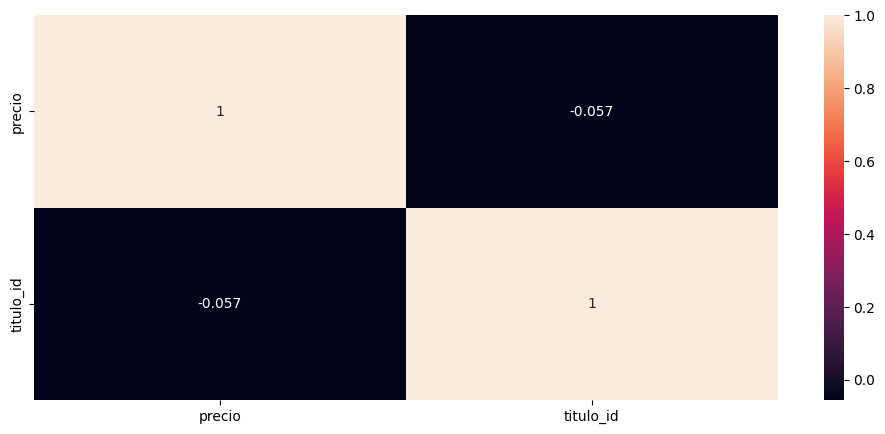

In [75]:
plt.figure(figsize=(12,5))
sns.heatmap(df.corr(),annot=True)

In [76]:
df.drop(df.loc[(df["precio"]>500000) | (df["precio"]<200000)].index) #No puse inplace entonces no lo reemplaza

,titulo,url,precio,titulo_id
2,Computador Portátil Evoo 14 Pulgadas Intel 4gb...,https://www.mercadolibre.com.ar/computador-por...,264999.0,3
4,Computadoras Notebook Laptop Baratas Ssd 256gb...,https://www.mercadolibre.com.ar/computadoras-n...,249999.0,5
8,Computadora Pc Cpu Solarmax Intel Core I3 12va...,https://click1.mercadolibre.com.ar/mclics/clic...,386490.0,9
21,Pc Armada Gamer Amd Ryzen 5 5600g 12 Nucleo Ra...,https://articulo.mercadolibre.com.ar/MLA-93229...,419999.0,22
23,Computadora Completa Intel Core I5 8 Gb 480 Gb...,https://articulo.mercadolibre.com.ar/MLA-13801...,289990.0,24
...,...,...,...,...
2109,Procesador gamer Intel Core i3-8100 BX80684I38...,https://www.mercadolibre.com.ar/procesador-gam...,210649.0,1701
2199,Tableta gr√°fica Wacom One DTC133W0A black y ...,https://www.mercadolibre.com.ar/tableta-grafic...,499999.0,1770
2200,Pc Lenovo Thinkcentre I3 240ssd 8gb Ram + Dvd ...,https://articulo.mercadolibre.com.ar/MLA-14597...,228222.0,1771
2202,Placa De Video Msi Gaming Radeon Rx 6800 X Tri...,https://www.mercadolibre.com.ar/placa-de-video...,399999.0,1773


In [77]:
df[(df['precio']<500000)&(df['precio']>200000)&(df['titulo_id']<80)&(df['titulo_id']>30)]





,titulo,url,precio,titulo_id
31,Pc Gamer A10 9700 //ddr4 8gb //ssd 240// Radeo...,https://articulo.mercadolibre.com.ar/MLA-92773...,235000.0,32
36,Computadora Completa Intel Core I5 16 Gb 480 S...,https://articulo.mercadolibre.com.ar/MLA-14474...,279990.0,37
37,Pc Ar Completa Core I5 8gb Ssd240 Led 20 Wi F...,https://articulo.mercadolibre.com.ar/MLA-11053...,282999.0,38
38,Computadora Cpu Armada Intel Core I5 16 Gb 480...,https://articulo.mercadolibre.com.ar/MLA-11151...,229990.0,39
47,Pc Armada Intel Core I7 1 Tb 16gb De Ram Grafi...,https://articulo.mercadolibre.com.ar/MLA-11200...,279999.0,48
55,Pc Armada Gamer Amd Ryzen 3 3200g 8gb Ddr4 Ssd...,https://click1.mercadolibre.com.ar/mclics/clic...,269315.0,56
66,Pc Ar Intel Core I7 1t 16gb Ram Graficos Hd Nu...,https://articulo.mercadolibre.com.ar/MLA-64328...,279999.0,67
68,Pc Armada Intel C I3 + 8 Gb Ssd 240 Wi Fi Nue...,https://articulo.mercadolibre.com.ar/MLA-88517...,239999.0,69
74,Pc Armada Intel Core I5 1tb 8gb Ram Graficos H...,https://articulo.mercadolibre.com.ar/MLA-80143...,264999.0,75
180,Pc Armada Gamer Amd Ryzen 3 3200g 8gb Ddr4 Ssd...,https://articulo.mercadolibre.com.ar/MLA-81330...,269315.0,56


In [86]:
df_dummies=pd.get_dummies(df,dtype=float) # convierte variables categoricas en numericas

df_dummies

,precio,titulo_id,titulo_ APC Back-UPS BR900G-AR 900VA entrada y salida de 230V negro,titulo_ APC Easy UPS BV1000I-AR 1000VA entrada y salida de 230V negro,titulo_ APC Easy UPS BV500I-AR 500VA entrada y salida de 230V negro,"titulo_ Captura De V√≠deo, Hdmi Usb3.0 4k",titulo_ Cpu Core I3 8 Gb Ram 320 Hd + Lcd 19 Oficinas/hogar/juego,titulo_ Pc Armada Pro Intel 3.6ghz Dual Core Ssd 120 Ram 4gb Ddr4,titulo_ Pc Cpu Computadora Amd 3.5ghz Dual-core Nueva C/garantia,titulo_3 Jack Interlock Hembra 3 Pin Ups Pc Monitor 10a,...,url_https://www.mercadolibre.com.ar/webcam-camara-web-hd-con-microfono-streaming-zoom-skype-usb/p/MLA19717387?pdp_filters=category:MLA1648#searchVariation=MLA19717387&position=12&search_layout=stack&type=product&tracking_id=7d40cbe1-c24f-4645-be1f-5d9773588e5b,url_https://www.mercadolibre.com.ar/webcam-camara-web-hd-microfono-usb-pc-windows-mac-zoom-color-negro/p/MLA24410534?pdp_filters=category:MLA1648#searchVariation=MLA24410534&position=3&search_layout=stack&type=product&tracking_id=cd23ae5f-7912-4308-8b3f-798dd0485f0b,url_https://www.mercadolibre.com.ar/webcam-camara-web-para-pc-full-hd-1080p-con-microfono-noga-e-color-negro/p/MLA19770865?pdp_filters=category:MLA1648#searchVariation=MLA19770865&position=13&search_layout=stack&type=product&tracking_id=7d40cbe1-c24f-4645-be1f-5d9773588e5b,url_https://www.mercadolibre.com.ar/webcam-camara-web-para-pc-full-hd-1080p-con-microfono-noga-e-color-negro/p/MLA19770865?pdp_filters=category:MLA1648#searchVariation=MLA19770865&position=21&search_layout=stack&type=product&tracking_id=8bd338f3-4b16-4fa5-ae92-9c877df49af3,url_https://www.mercadolibre.com.ar/webcam-camara-web-usb-1080-full-hd-plugplay-sin-instalacion-color-negro/p/MLA19842776?pdp_filters=category:MLA1648#searchVariation=MLA19842776&position=7&search_layout=stack&type=product&tracking_id=7d40cbe1-c24f-4645-be1f-5d9773588e5b,url_https://www.mercadolibre.com.ar/webcam-cover-spyslide-tapa-camara-de-notebook-celu-no-hacker/p/MLA20040758?pdp_filters=category:MLA1648#searchVariation=MLA20040758&position=7&search_layout=stack&type=product&tracking_id=86c62286-0849-4daf-8874-ee9a5d7ee95a,url_https://www.mercadolibre.com.ar/western-digital-wd-elements-portable-wdbuzg0010bbk-1-tb-negro/p/MLA6326753?pdp_filters=category:MLA1648#searchVariation=MLA6326753&position=7&search_layout=stack&type=product&tracking_id=19caf46a-c541-485b-a854-81ba174d09b9,url_https://www.mercadolibre.com.ar/xiaomi-mi-headphones-basic-hser02jy-plateado/p/MLA14652431?pdp_filters=category:MLA1648#searchVariation=MLA14652431&position=10&search_layout=stack&type=product&tracking_id=cc07faa2-1ee3-494e-a3e9-898d4be869f0,url_https://www.mercadolibre.com.ar/xp-pen-star-g430s-black/p/MLA9639301?pdp_filters=category:MLA1648#searchVariation=MLA9639301&position=15&search_layout=stack&type=product&tracking_id=8bd338f3-4b16-4fa5-ae92-9c877df49af3,url_https://www.mercadolibre.com.ar/xtrike-me-gm-216-negro/p/MLA16050081?pdp_filters=category:MLA1648#searchVariation=MLA16050081&position=32&search_layout=stack&type=product&tracking_id=93a2f6ff-08e0-40e7-bb28-58b54883d8cd
0,66699.0,1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,789999.0,2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,264999.0,3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,1573218.0,4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,249999.0,5,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2201,27375.0,1772,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2202,399999.0,1773,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2203,6710.0,1774,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2204,232639.0,1775,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


Text(20000, 60, 'Promedio: precio    17301.248175\ndtype: float64')

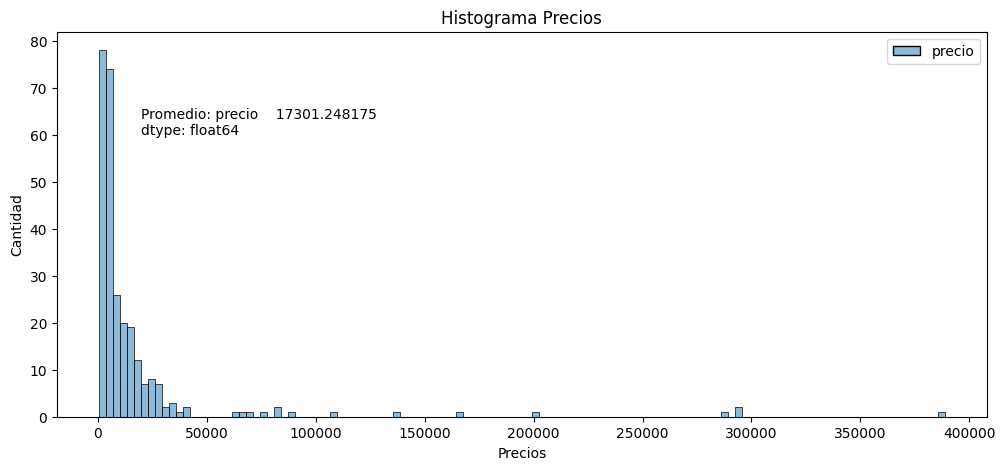

In [78]:
df_precios=df.loc[df.titulo.str.contains('mouse',case= False, na=False),['precio']]

fig,ax=plt.subplots(figsize=(12,5))

sns.histplot(df_precios)
ax.set_title('Histograma Precios')
ax.set_xlabel('Precios')
ax.set_ylabel('Cantidad')
ax.text(20000,60,f"Promedio: {df_precios.mean()}")

<Axes: xlabel='titulo', ylabel='count'>

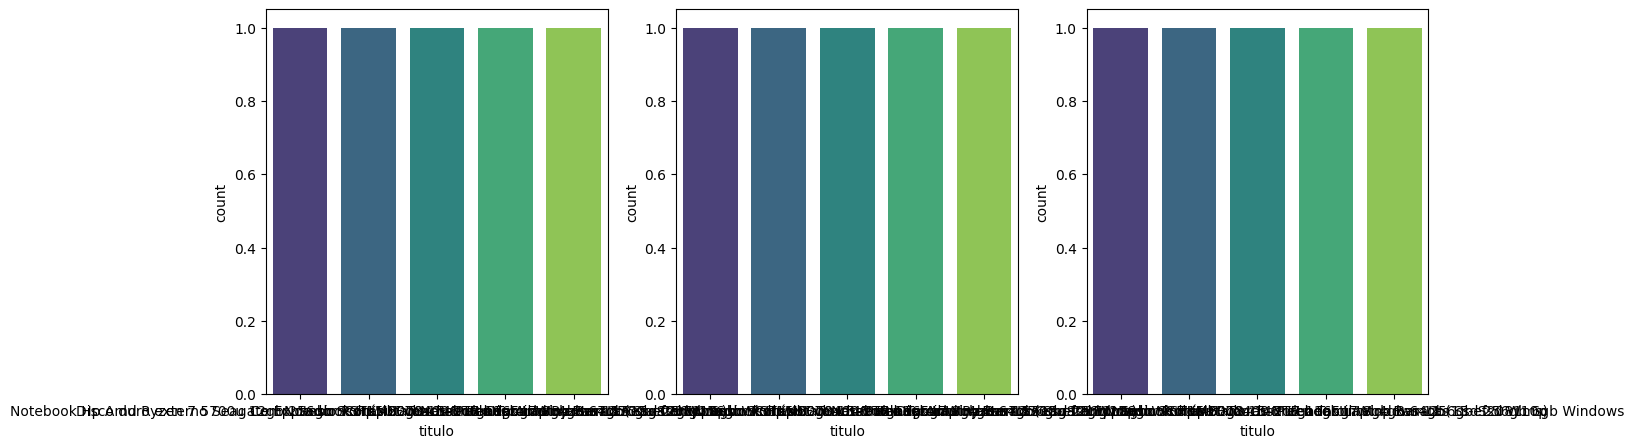

In [85]:
fig= plt.figure(figsize=(15,5))

ax1=plt.subplot(1,3,1)
sns.countplot(data=df,x=df['titulo'].head(5),palette='viridis')

ax2=plt.subplot(1,3,2,sharey=ax1)
sns.countplot(data=df,x=df['titulo'].head(5),palette='viridis')


ax3=plt.subplot(1,3,3,sharey=ax1)
sns.countplot(data=df,x=df['titulo'].head(5),palette='viridis')